# UMAP Analysis on Synthetic Cell Data

In this notebook, we will generate a synthetic dataset of cell measurements, compute UMAP embeddings, and visualize these using seaborn. We will save the plot as a PNG file.

## Step 1: Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap

## Step 2: Create a Synthetic Dataset

We will simulate measurements of cells, including intensity, aspect ratio, perimeter, and elongation.

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic data
data = {
    'intensity': np.random.normal(loc=100, scale=10, size=200),
    'aspect_ratio': np.random.normal(loc=1.5, scale=0.3, size=200),
    'perimeter': np.random.normal(loc=50, scale=5, size=200),
    'elongation': np.random.normal(loc=0.5, scale=0.1, size=200)
}

# Convert to pandas DataFrame
df = pd.DataFrame(data)
df.head()

,intensity,aspect_ratio,perimeter,elongation
0,104.967142,1.607336,42.027862,0.575699
1,98.617357,1.668235,47.003125,0.407783
2,106.476885,1.824915,50.026218,0.586961
3,115.230299,1.816141,50.234903,0.635564
4,97.658466,1.086699,47.749673,0.541343


## Step 3: Standardize the Dataset

Standardize the features before applying UMAP.

In [3]:
# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the dataset
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()

,intensity,aspect_ratio,perimeter,elongation
0,0.578767,0.276191,-1.521625,0.735502
1,-0.104981,0.482377,-0.518096,-0.915547
2,0.741336,1.012849,0.091673,0.846234
3,1.683908,0.983140,0.133765,1.324132
4,-0.208235,-1.486529,-0.367515,0.397699


## Step 4: Compute UMAP Embeddings

In [4]:
# Initialize UMAP model
reducer = umap.UMAP(random_state=42)

# Fit and transform the data
umap_embeddings = reducer.fit_transform(scaled_df)

# Add UMAP embeddings to the original DataFrame
df['UMAP_1'] = umap_embeddings[:, 0]
df['UMAP_2'] = umap_embeddings[:, 1]
df.head()

/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


,intensity,aspect_ratio,perimeter,elongation,UMAP_1,UMAP_2
0,104.967142,1.607336,42.027862,0.575699,7.636272,7.111036
1,98.617357,1.668235,47.003125,0.407783,7.310424,5.112616
2,106.476885,1.824915,50.026218,0.586961,5.525376,7.856729
3,115.230299,1.816141,50.234903,0.635564,5.447434,7.748721
4,97.658466,1.086699,47.749673,0.541343,2.902001,4.984468


## Step 5: Visualize the UMAP Results

We will use seaborn to create a scatter plot of the UMAP results.

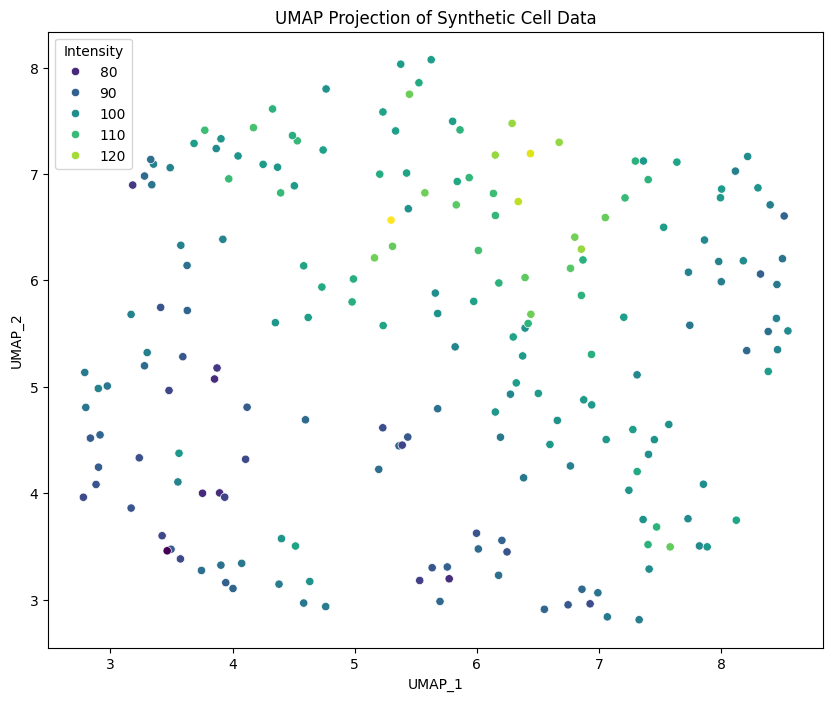

In [5]:
# Create UMAP scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP_1', y='UMAP_2', data=df, hue='intensity', palette='viridis')
plt.title('UMAP Projection of Synthetic Cell Data')
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.legend(title='Intensity')

# Save the plot
plt.savefig('umap_projection.png')

# Show the plot
plt.show()